# Goals

The goal of today's exercise is to make you familiarize with multi-variable linear regression models for forecasting, amd with the concepts of the *$R^2$ coefficient* and of the *F ratio* for the Fisher test, or *F-test*. Read carefully and understand the two examples at the beginning of the notebook, and then implement yourself the regression model and compute the relevant statistical estimators following the instructions in each cell that follows.

# Forecasting Models Based on Regression

Forecasting models based on regression are examples of explanatory models constructed under the assumption that there is a possible relationship between the variable to be forecast and a number of independent variables.

The term **regression** refers to a certain type of statistical model that attempts to describe the relationship of one variable, called the **dependent variable** (usually denoted by Y), and a number of other variables X₁, X₂, ..., Xₖ, called the **explanatory** or **independent variables**. We shall only consider the case of an additive error, represented by e, where the relationship can be written as:

$$ Y = f(X₁, ..., Xₖ; b₀, b₁, ..., bₚ) + e $$

Here:
- \(f\) is a given function known as the **regression function**.
- The function depends on parameters or coefficients, denoted by \(b₀, b₁, ..., bₚ\).
- The parameters' values are not known and need to be estimated.
- The number of regression parameters \(r = p + 1\) is not necessarily the same as \(k\).
- There is an additional uncertain element in the relationship, represented by the random variable \(e\).
- The probability distribution of \(e\) is usually specified, often assumed to be normal (N(0, σ²)), but with the variance $(\sigma²)$ unknown.

The two cells below show you an example of multi-variable linear regression for some bank data contained in the ``Bank.xls`` spreadsheet, where you predict the values of the dependent variable 'DEOM' from the three independent variables 'AAA', 'Tto4', 'D3to4'.

In [1]:
from pandas import read_excel
from statsmodels.formula.api import ols
series = read_excel('Bank.xls',
                    sheet_name='Data2', header=0,
                     dtype=float)

#reading the basic variables
DEOM = series.DEOM
AAA = series.AAA
Tto4 = series.Tto4
D3to4 = series.D3to4

#Regression model(s)
formula = 'DEOM ~ AAA + Tto4 + D3to4'

#Ordinary Least Squares (OLS)
results = ols(formula, data=series).fit()
print(results.summary())

# Here the main table is the first one,
# where the main statistics are the R-squared (line 1)
# and the P-value; i.e., Prob (F-statistic)

                            OLS Regression Results                            
Dep. Variable:                   DEOM   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     20.85
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           7.59e-09
Time:                        12:34:06   Log-Likelihood:                -112.87
No. Observations:                  53   AIC:                             233.7
Df Residuals:                      49   BIC:                             241.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3391      3.259     -1.331      0.1

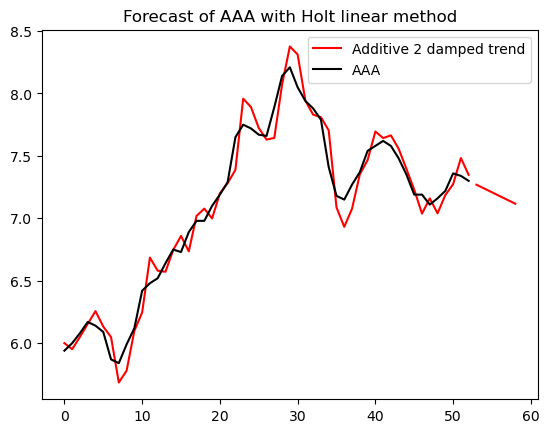

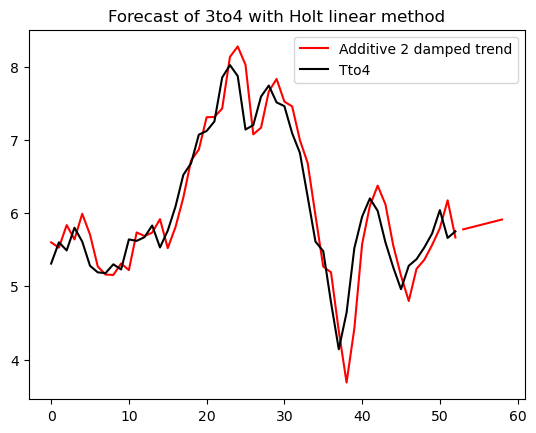

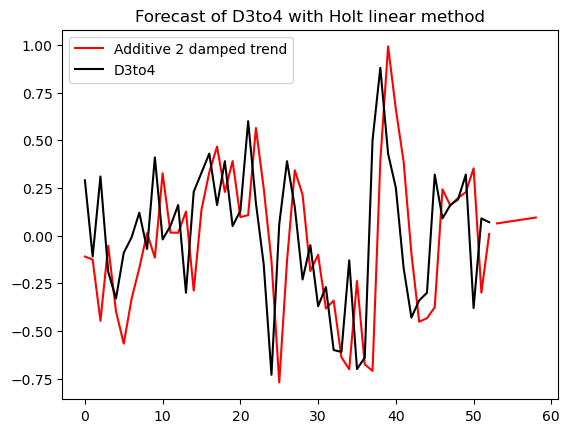

                            OLS Regression Results                            
Dep. Variable:                   DEOM   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     20.85
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           7.59e-09
Time:                        12:34:06   Log-Likelihood:                -112.87
No. Observations:                  53   AIC:                             233.7
Df Residuals:                      49   BIC:                             241.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3391      3.259     -1.331      0.1

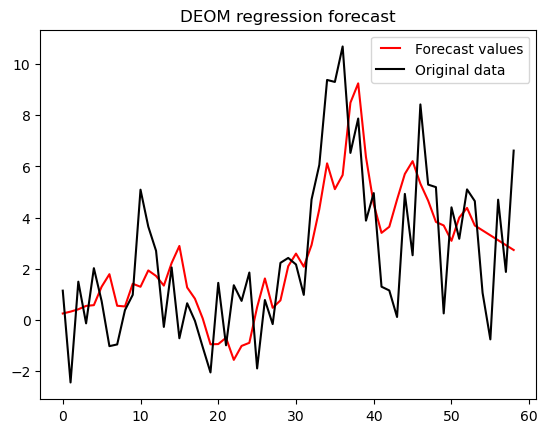

In [2]:
from statsmodels.tsa.api import Holt
import matplotlib.pyplot as plt
import numpy as np

series = read_excel('Bank.xls',
                    sheet_name='Data2', header=0,
                      dtype=float)

# Reading the basic variables
DEOM = series.DEOM
AAA = series.AAA
Tto4 = series.Tto4
D3to4 = series.D3to4

# Forecasting for AAA using Holt's linear method
fit1 = Holt(AAA).fit(optimized=True)
fcast1 = fit1.forecast(6).rename("Additive 2 damped trend")
fit1.fittedvalues.plot(color='red')
fcast1.plot(color='red', legend=True)
AAA.plot(color='black', legend=True)
plt.title('Forecast of AAA with Holt linear method')
plt.show()

# Forecasting for Tto4 using Holt's linear method
fit2 = Holt(Tto4).fit(optimized=True)
fcast2 = fit2.forecast(6).rename("Additive 2 damped trend")
fit2.fittedvalues.plot(color='red')
fcast2.plot(color='red', legend=True)
Tto4.plot(color='black', legend=True)
plt.title('Forecast of 3to4 with Holt linear method')
plt.show()

# Forecasting for D3to4 using Holt's linear method
fit3 = Holt(D3to4).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
#fit3 = Holt(D3to4).fit(optimized=True)
fcast3 = fit3.forecast(6).rename("Additive 2 damped trend")
fit3.fittedvalues.plot(color='red')
fcast3.plot(color='red', legend=True)
D3to4.plot(color='black', legend=True)
plt.title('Forecast of D3to4 with Holt linear method')
plt.show()

# Building the regression based forecast for main variable, DEOM
# Regression model(s)
formula = 'DEOM ~ AAA + Tto4 + D3to4'

# ols generate statistics and the parameters b0, b1, etc., of the model
results = ols(formula, data=series).fit()
print(results.summary())
b0 = results.params.Intercept
b1 = results.params.AAA
b2 = results.params.Tto4
b3 = results.params.D3to4

# putting the fitted values of the forecasts of AAA, Tto4, and D3to4 in arrays
a1 = np.array(fit1.fittedvalues)
a2 = np.array(fit2.fittedvalues)
a3 = np.array(fit3.fittedvalues)

# Building the fitted part of the forecast of DEOM
F=a1
for i in range(53):
    F[i] = b0 + a1[i]*b1 + a2[i]*b2 + a3[i]*b3

# putting the values of the forecasts of AAA, Tto4, and D3to4 in arrays
v1=np.array(fcast1)
v2=np.array(fcast2)
v3=np.array(fcast3)

# Building the 6 values of the forecast ahead
E=v1
for i in range(6):
    E[i] = b0 + v1[i]*b1 + v2[i]*b2 + v3[i]*b3


# Joining the fitted values of the forecast and the points ahead
K=np.append(F, E)

# Reading the original DEOM time series for all the 59 periods
DEOMfull0 = read_excel('Bank.xls',
                       sheet_name='Data4', header=0,
                     dtype=float)


DEOMfull = DEOMfull0.DEOMfull

# Plotting the graphs of K and DEOMfull with legends
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(K, color='red', label='Forecast values')
line2, = plt.plot(DEOMfull, color='black', label='Original data')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.title('DEOM regression forecast')
plt.show()

Complete the cell above to load once again the 'Data2' sheet in the 'Bank.xls' file, into a pandas dataframe called 'series_2'. Then, load the dependent variable 'DEOM_2', and the independent variables 'AAA_2', 'Tto4_2', 'D3to4_2'. Finally, build and fit a regression model to forecast the main vadiable 'DEOM' as you have seen in the previous example, printing the summary of results to screen. The goal of this part of the exercise is that you do it yourself from scratch.

In [3]:
series_2 = read_excel('Bank.xls',
                    sheet_name='Data2', header=0,
                      dtype=float)
DEOM_2 = series_2.DEOM
AAA_2 = series_2.AAA
Tto4_2 = series_2.Tto4
D3to4_2 = series_2.D3to4

#Regression model(s)
formula_2 = 'DEOM ~ AAA + Tto4 + D3to4'

#Ordinary Least Squares (OLS)
results_2 = ols(formula_2, data=series_2).fit()
print(results_2.summary())


                            OLS Regression Results                            
Dep. Variable:                   DEOM   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     20.85
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           7.59e-09
Time:                        12:34:06   Log-Likelihood:                -112.87
No. Observations:                  53   AIC:                             233.7
Df Residuals:                      49   BIC:                             241.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3391      3.259     -1.331      0.1

With $Y$ representing the  observed values, $\hat{Y}$ the estimates of $Y$ from the (linear) regression and $\overline{Y}$ the mean of the obbserved values, recall:

**Total sum of squares, mean-corrected (SST)**:
$$
SST = \sum_{i=1}^{n} (Y_i-\overline{Y})^2
$$

**Regression sum of squares (SSR)**:
$$
SSR = \sum_{i=1}^{n} (\hat{Y}_i-\overline{Y})^2
$$

**Resiudal, or error sum of squares (SSE)**:
$$
SSE = \sum_{i=1}^{n} (Y_i-\hat{Y}_i)^2
$$

In the cell below, compute the estimates of 'DEOM' from the linear regression ($\overline{Y}$ in the forumlas above) into the ``estimates`` array. You can use the ``predict`` method of statsmodel (<a href="https://www.statsmodels.org/devel/examples/notebooks/generated/predict.html">documentation</a>) of compute them manually as done for F in the previous example. As an exercise, you can use both methods and then compare the results to make sure they match

In [4]:
estimates = results_2.predict(series_2) 

Using the ``estimates`` array, in the cell below, compute the SST, SSR, SSE for the bank data you have previously loaded.

In [5]:
mean = np.mean(DEOM_2)
SST = np.sum((DEOM_2-mean)**2)
SSR = np.sum((estimates-mean)**2)
SSE = np.sum((DEOM_2-estimates)**2)
print(SST, SSR, SSE)

499.9861000754714 280.38128991148886 219.6048101639827


Recall that the **square of the multiple correlation coefficient** is defined as: 

$R^2 = \frac{SSR}{SST} =1 - \frac{SSE}{SST}$

Compute it below, and compare it with the value returned when you have printed to screen the results of the regression (you can also retrieve it using the <a href="https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.rsquared.html">rsquared</a> method in statsmodel). You should obtain the same result.

In [6]:
R2 = 1-SSE / SST
print(R2, results_2.rsquared)

0.5607781693714405 0.5607781693714404


Recall that the **mean squares** are defined, respectively, as:

**Total (MST)**: $$ SST = \frac{1}{n-1} \sum_{i=1}^{n} (Y_i-\overline{Y})^2 $$

**Explained (MSR)**: $$ SSR = \frac{1}{k} \sum_{i=1}^{n} (\hat{Y}_i-\overline{Y})^2 $$

**Unexplained (MSE)**: $$ SSE =\frac{1}{n-k-1} \sum_{i=1}^{n} (Y_i-\hat{Y}_i)^2 $$

where $n$ is the number of observations, and $k$ is the number of coefficients in the regression. Compute them in the cell below. You have an example for the MSE computation in the second cell.

In [7]:
k = 3
n = len(DEOM_2)
MST = 1 / (n-1) * 1.0 * SST
MSR = 1 / (k) * 1.0 * SSR
MSE = 1 / (n-k-1) * 1.0 * SSE
print(MST, MSR, MSE)

9.615117309143681 93.46042997049628 4.481730819673116


Now compute the value for the F ratio value for the **F-test of overall significance**:

$F = \frac{MSR}{MSE}$

and compare it with the value printed in the summary of the regression fit results. You should obtain the same value.

In [8]:
F = MSR / MSE
print(F)

20.8536464439676
